# Preprocess SMART-seq

In [1]:
import anndata
import scanpy as sc

## Load data

- Gene raw counts matrix from SMART-seq

In [2]:
adata = anndata.read_h5ad('../input/SMART.Neuron.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 4051 × 24446
    obs: 'MajorType', 'SubType'

## Preprocessing

In [4]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

adata

AnnData object with n_obs × n_vars = 4051 × 20152
    obs: 'MajorType', 'SubType', 'n_genes'
    var: 'n_cells'

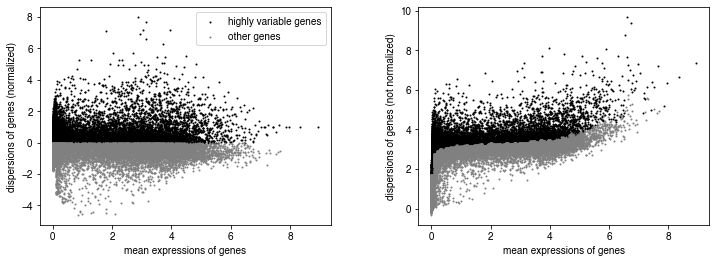

In [5]:
# basic steps of the scanpy clustering process
adata.layers['raw'] = adata.X.copy()
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_bins=100, n_top_genes=10000)
sc.pl.highly_variable_genes(adata)

## Save AnnData

In [6]:
# this is the total adata without downsample
adata.write_h5ad(f'SMART.TotalAdata.norm_log1p.h5ad')

In [7]:
adata

AnnData object with n_obs × n_vars = 4051 × 20152
    obs: 'MajorType', 'SubType', 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'raw'